In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [125]:
df = pd.read_csv("Online_Fraud.csv")

In [126]:
df.head()

,Amount,Old_balance,New_balance,Transaction_type,Location,is_vpn,Is_fraud
0,137.09,170.75,33.66,payment,Kolkata,no,no
1,6800.93,8528.01,1727.08,withdrawal,Chennai,no,no
2,3854.82,7513.37,3658.55,refund,Hyderabad,no,no
3,252.73,2767.54,2514.81,refund,Delhi,no,no
4,7731.74,10401.52,2669.78,withdrawal,Kolkata,no,no


In [127]:
df.tail()

,Amount,Old_balance,New_balance,Transaction_type,Location,is_vpn,Is_fraud
7995,7101.01,9777.58,2676.57,refund,Mumbai,yes,yes
7996,2005.07,6549.19,4544.12,withdrawal,Bangalore,no,no
7997,3817.84,4593.64,775.80,refund,Chennai,yes,no
7998,3964.29,8857.52,4893.23,withdrawal,Bangalore,no,no
7999,5390.66,9782.47,4391.81,withdrawal,Kolkata,no,no


In [128]:
df.columns

Index(['Amount', 'Old_balance', 'New_balance', 'Transaction_type', 'Location',
       'is_vpn', 'Is_fraud'],
      dtype='object')

In [129]:
df['Transaction_type'].value_counts()

,count
Transaction_type,
payment,2760
withdrawal,2680
refund,2560


In [130]:
df['Location'].value_counts()

,count
Location,
Bangalore,1416
Chennai,1360
Mumbai,1352
Delhi,1328
Hyderabad,1296
Kolkata,1248


In [131]:
df['is_vpn'].value_counts()

,count
is_vpn,
no,4168
yes,3832


In [132]:
df['Is_fraud'].value_counts()

,count
Is_fraud,
no,4968
yes,3032


In [133]:
df.isnull().sum()

,0
Amount,0
Old_balance,0
New_balance,0
Transaction_type,0
Location,0
is_vpn,0
Is_fraud,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount            8000 non-null   float64
 1   Old_balance       8000 non-null   float64
 2   New_balance       8000 non-null   float64
 3   Transaction_type  8000 non-null   object 
 4   Location          8000 non-null   object 
 5   is_vpn            8000 non-null   object 
 6   Is_fraud          8000 non-null   object 
dtypes: float64(3), object(4)
memory usage: 437.6+ KB


In [135]:
df.describe()

,Amount,Old_balance,New_balance
count,8000.000000,8000.000000,8000.000000
mean,4870.072340,7427.968500,2557.896160
std,2879.642576,3280.813309,1454.249038
min,29.940000,126.290000,3.800000
25%,2403.700000,4893.095000,1348.447500
50%,4682.045000,7426.905000,2657.785000
75%,7394.875000,10052.025000,3869.250000
max,9996.510000,14278.560000,4999.150000


In [136]:
df.columns

Index(['Amount', 'Old_balance', 'New_balance', 'Transaction_type', 'Location',
       'is_vpn', 'Is_fraud'],
      dtype='object')

In [137]:
X = df[['Amount', 'Old_balance', 'New_balance', 'Transaction_type', 'Location',
       'is_vpn']]
y = df['Is_fraud']

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
numeric_features = ['Amount', 'Old_balance', 'New_balance']
categorical_features = ['Transaction_type', 'Location',
       'is_vpn']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [140]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline(steps=[('preprocessor', preprocessor),
                        ('Regressor', KNeighborsClassifier() )])
KNN.fit(X_train, y_train)

# Predict on the test set
y_pred = KNN.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
KNN_score=int(accuracy * 100)
# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.99625
Precision: 0.9962719941348973
Recall: 0.99625
F1 Score: 0.9962458164300203


In [141]:
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline with MultinomialNB (Naive Bayes)
NB_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', MultinomialNB())])

# Fit the model
NB_model.fit(X_train, y_train)

# Predict on the test set
y_pred = NB_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
NB_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6125
Precision: 0.6377848304606776
Recall: 0.6125
F1 Score: 0.6193032598122895


In [142]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the pipeline with Perceptron
perceptron_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', Perceptron(max_iter=1000, tol=1e-3, random_state=42))])

# Fit the model
perceptron_model.fit(X_train, y_train)

# Predict on the test set
y_pred = perceptron_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
perceptron_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.635625
Precision: 0.404019140625
Recall: 0.635625
F1 Score: 0.494024168895682


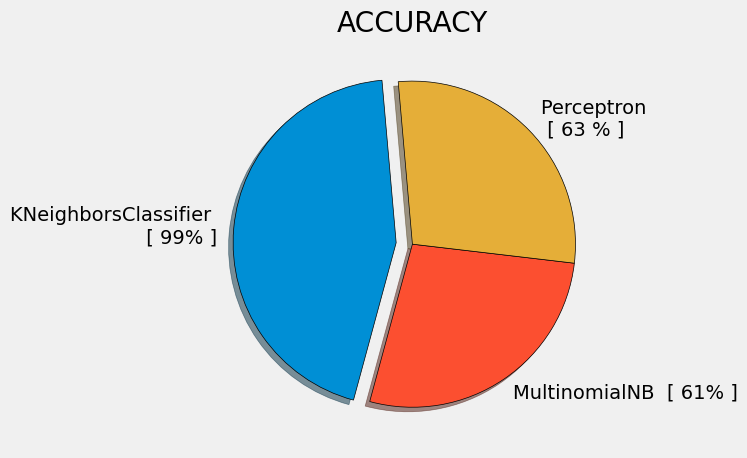

In [147]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [KNN_score, NB_score, perceptron_score]
labels = [f'KNeighborsClassifier \n [ {KNN_score}% ]',f'MultinomialNB  [ {NB_score}% ]',f'Perceptron \n [ {perceptron_score} % ]']
explode = [0.1,0, 0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})



plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [144]:
df

,Amount,Old_balance,New_balance,Transaction_type,Location,is_vpn,Is_fraud
0,137.09,170.75,33.66,payment,Kolkata,no,no
1,6800.93,8528.01,1727.08,withdrawal,Chennai,no,no
2,3854.82,7513.37,3658.55,refund,Hyderabad,no,no
3,252.73,2767.54,2514.81,refund,Delhi,no,no
4,7731.74,10401.52,2669.78,withdrawal,Kolkata,no,no
...,...,...,...,...,...,...,...
7995,7101.01,9777.58,2676.57,refund,Mumbai,yes,yes
7996,2005.07,6549.19,4544.12,withdrawal,Bangalore,no,no
7997,3817.84,4593.64,775.80,refund,Chennai,yes,no
7998,3964.29,8857.52,4893.23,withdrawal,Bangalore,no,no


In [148]:
import pickle
# Dump the trained KNN classifier with Pickle
KNN_filename = 'KNN.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()